In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression_cv0.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

10/09/2020 14:54:19 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/09/2020 14:54:22 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/09/2020 14:54:24 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/09/2020 14:54:26 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
dtfa.num_blocks

618

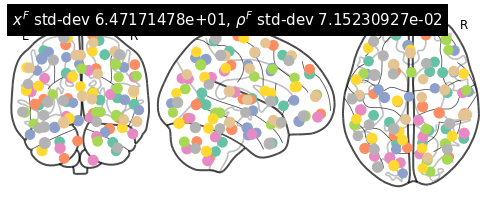

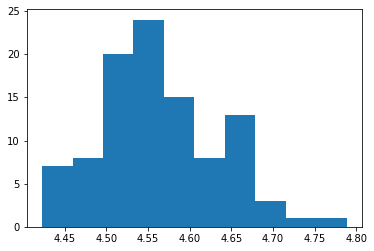

(<nilearn.plotting.displays.OrthoProjector at 0x7fadad61ecd0>,
 tensor([[ 56.5287, -56.6747,   1.3314],
         [-21.6478, -39.5231, -38.0387],
         [ 25.8120,  23.8284,  53.6167],
         [-43.5857,  24.6794,   0.3491],
         [ 20.0252, -48.2218,  68.3789],
         [-14.2679, -61.9559,   3.8896],
         [ 39.1191,  -8.4141,   8.0970],
         [ 34.3838,  12.7030, -38.8559],
         [-38.2901, -32.3370,  57.7355],
         [ 37.7405, -46.7498, -47.7056],
         [ 20.7510,  13.7064,   5.8798],
         [ 13.2035, -61.1620,  13.8987],
         [-14.5626,  52.1736,  33.9472],
         [ 13.6088,  64.0136,  -8.1714],
         [-12.9763, -18.0256,   7.4401],
         [-15.2991,  13.9410,  63.9646],
         [ -2.7588, -66.5056, -37.2537],
         [ 57.4169, -30.4751,  43.0131],
         [-38.5022,  -9.8059,   6.8945],
         [ 30.6317, -29.7086, -24.4753],
         [ 16.6666,  52.1641,  38.8335],
         [ 40.6278, -75.9889, -12.8717],
         [ 13.3093, -23.0806,  74.1

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 5e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

10/09/2020 15:01:25 [Epoch 1] (11362ms) Posterior free-energy 1.72997100e+10 = KL from prior 1.09603860e+07 - log-likelihood -1.72887511e+10
10/09/2020 15:01:25 Saving checkpoint...
10/09/2020 15:01:34 [Epoch 2] (8982ms) Posterior free-energy 1.69901435e+10 = KL from prior 3.29001075e+06 - log-likelihood -1.69868544e+10
10/09/2020 15:01:43 [Epoch 3] (8765ms) Posterior free-energy 1.67244564e+10 = KL from prior 1.23929575e+06 - log-likelihood -1.67232184e+10
10/09/2020 15:01:52 [Epoch 4] (8774ms) Posterior free-energy 1.64967752e+10 = KL from prior 7.07150562e+05 - log-likelihood -1.64960655e+10
10/09/2020 15:02:01 [Epoch 5] (8783ms) Posterior free-energy 1.63248097e+10 = KL from prior 5.72031000e+05 - log-likelihood -1.63242383e+10
10/09/2020 15:02:09 [Epoch 6] (8782ms) Posterior free-energy 1.61598689e+10 = KL from prior 5.12519406e+05 - log-likelihood -1.61593539e+10
10/09/2020 15:02:18 [Epoch 7] (8808ms) Posterior free-energy 1.60303299e+10 = KL from prior 4.88433906e+05 - log-likel

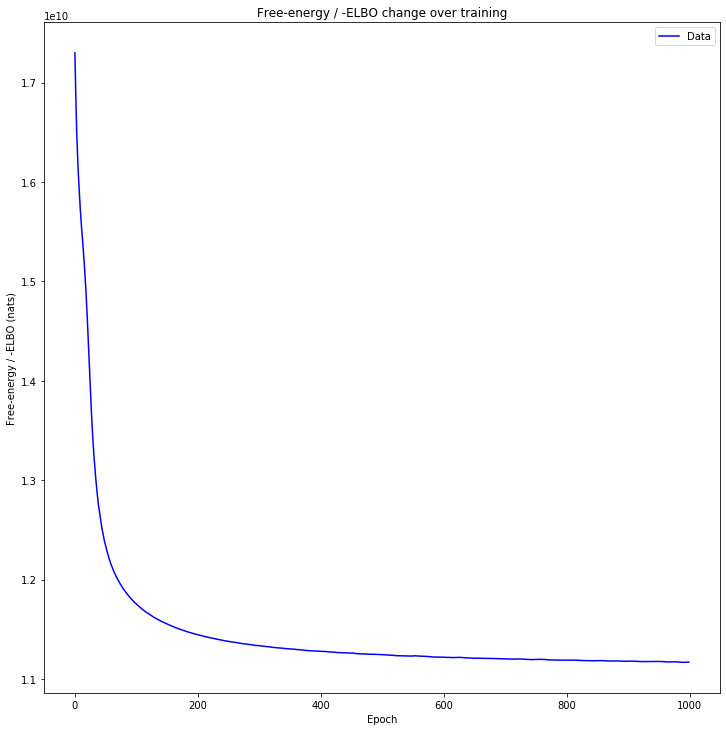

In [10]:
utils.plot_losses(losses)

In [11]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False, held_out_tasks=set(['tones', 'response'])))

10/09/2020 18:20:26 [Epoch 1] (46568ms) Posterior free-energy 7.98037299e+09 = KL from prior 2.84569531e+05 - log-likelihood -7.98008883e+09
10/09/2020 18:20:26 Saving checkpoint...
10/09/2020 18:20:29 [Epoch 2] (2938ms) Posterior free-energy 7.82386688e+09 = KL from prior 2.84150812e+05 - log-likelihood -7.82358272e+09
10/09/2020 18:20:32 [Epoch 3] (2991ms) Posterior free-energy 7.73130086e+09 = KL from prior 2.83767156e+05 - log-likelihood -7.73101773e+09
10/09/2020 18:20:35 [Epoch 4] (2939ms) Posterior free-energy 7.52610099e+09 = KL from prior 2.83574344e+05 - log-likelihood -7.52581734e+09
10/09/2020 18:20:38 [Epoch 5] (2939ms) Posterior free-energy 7.42961152e+09 = KL from prior 2.83305062e+05 - log-likelihood -7.42932838e+09
10/09/2020 18:20:41 [Epoch 6] (2938ms) Posterior free-energy 7.29923277e+09 = KL from prior 2.83010094e+05 - log-likelihood -7.29894963e+09
10/09/2020 18:20:44 [Epoch 7] (2942ms) Posterior free-energy 7.14934374e+09 = KL from prior 2.83442531e+05 - log-likel

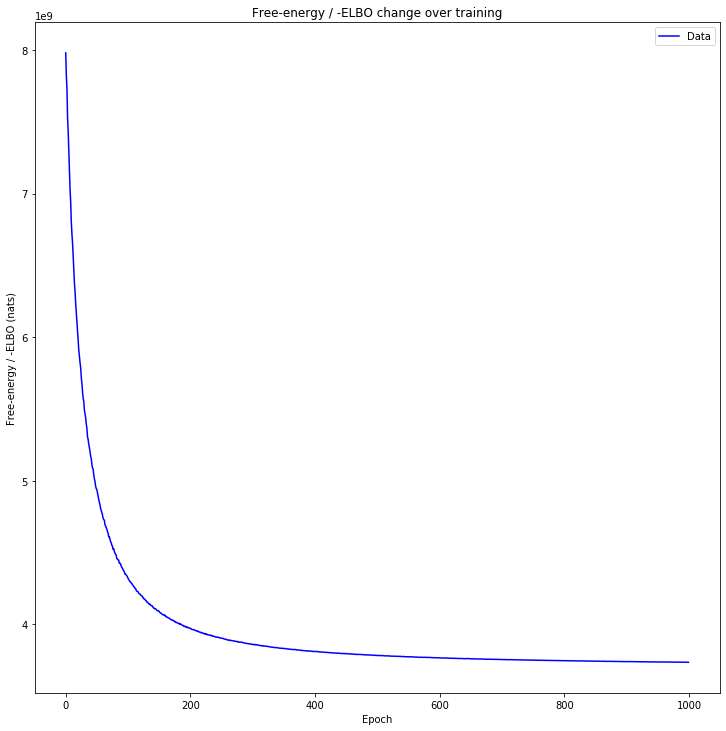

In [12]:
utils.plot_losses(losses)

In [13]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [14]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [15]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

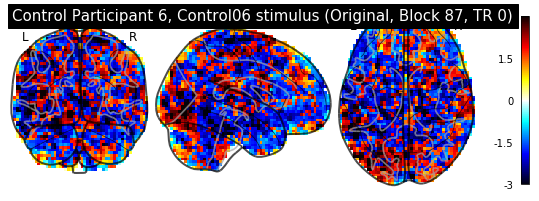

10/09/2020 19:09:44 Reconstruction Error (Frobenius Norm): 1.42956253e+02 out of 9.82731445e+02


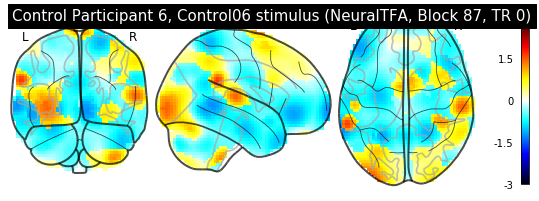

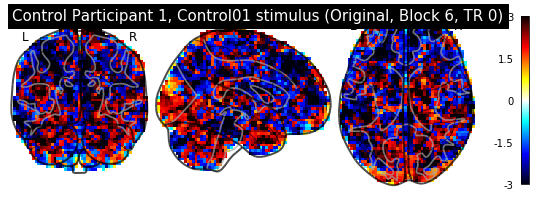

10/09/2020 19:09:47 Reconstruction Error (Frobenius Norm): 1.54476334e+02 out of 8.46852173e+02


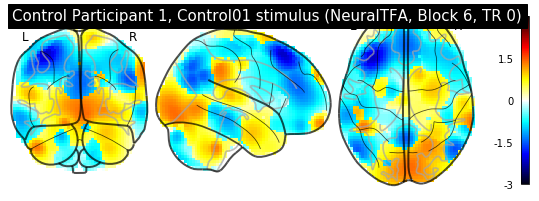

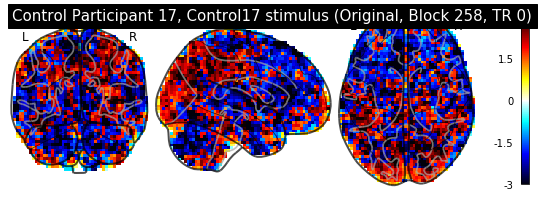

10/09/2020 19:09:50 Reconstruction Error (Frobenius Norm): 1.69846420e+02 out of 8.40549866e+02


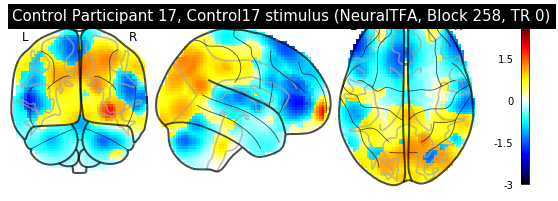

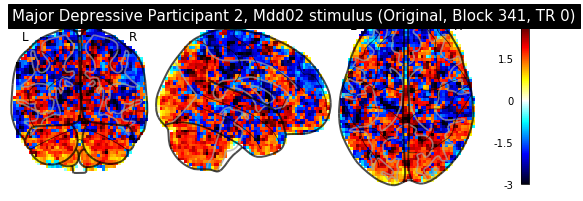

10/09/2020 19:09:52 Reconstruction Error (Frobenius Norm): 1.14140793e+02 out of 7.89750366e+02


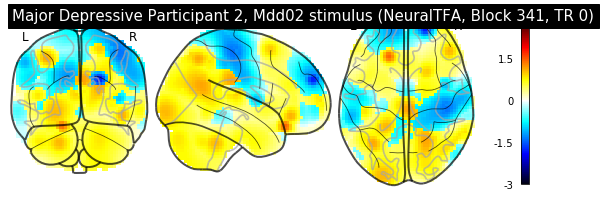

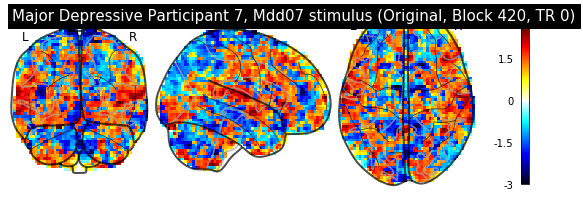

10/09/2020 19:09:55 Reconstruction Error (Frobenius Norm): 1.09174019e+02 out of 7.74325378e+02


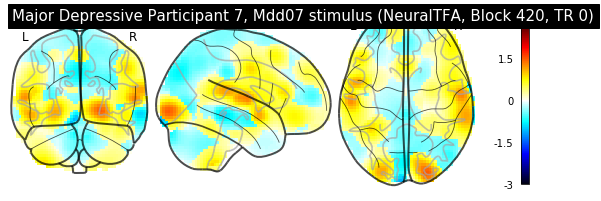

In [16]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

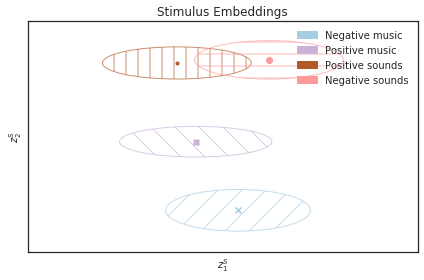

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


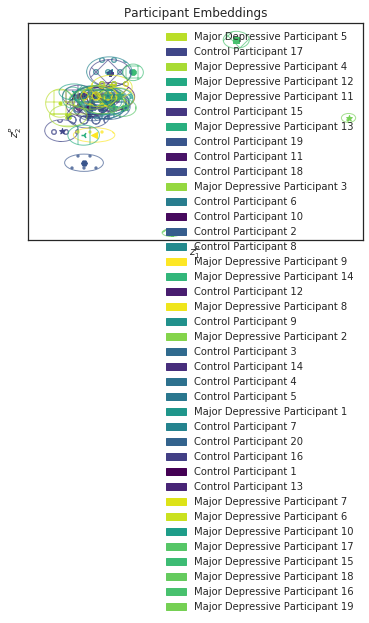

In [18]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

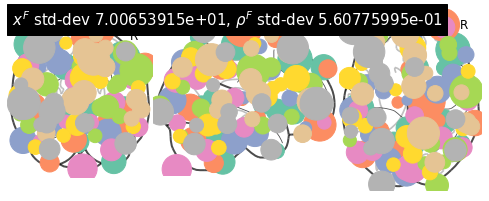

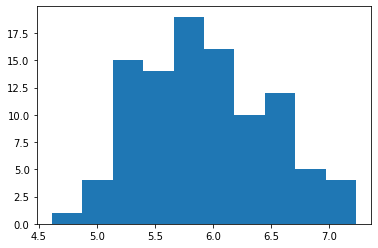

(<nilearn.plotting.displays.OrthoProjector at 0x7fad900fdf10>,
 tensor([[  54.5422,  -61.6068,    2.2986],
         [  -2.6847,  -45.6593,  -37.4433],
         [  45.2080,   36.8411,   49.3933],
         [ -45.2337,   36.4134,   -8.0518],
         [   5.8231,  -63.8861,   72.3321],
         [ -17.0030,  -60.1230,   -1.5971],
         [  46.3898,    2.5903,    0.2200],
         [  35.8406,   17.6426,  -47.0335],
         [ -53.8298,  -24.9185,   64.4489],
         [  35.3987,  -39.1260,  -58.7825],
         [   7.8370,   18.0038,   -4.2352],
         [   1.4663,  -50.2118,    8.5281],
         [ -15.8659,   66.9663,   40.9183],
         [  35.0283,   62.8996,  -19.6959],
         [ -12.8626,  -18.7017,    6.7093],
         [  -1.1186,   16.2843,   70.1300],
         [  -6.8199,  -70.3045,  -35.7079],
         [  68.1144,  -40.4341,   41.6938],
         [ -44.5218,   -1.5410,  -12.0291],
         [  29.8350,  -37.8081,  -17.7896],
         [  25.1001,   71.4866,   39.2629],
         [  5

In [19]:
dtfa.visualize_factor_embedding()

In [20]:
dtfa.average_reconstruction_error()

10/09/2020 19:10:26 Average reconstruction error (MSE): 8.90604083e-01
10/09/2020 19:10:26 Average data norm (Euclidean): 1.05002988e+00
10/09/2020 19:10:26 Percent average reconstruction error: 0.342518


(0.8906040826410156, 1.0500298773474526, 0.0034251790061448862)

In [21]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

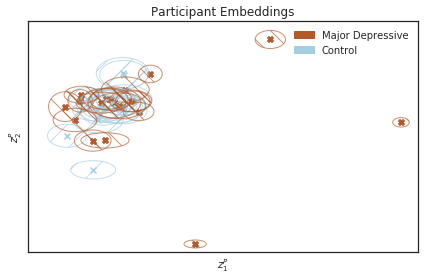

In [22]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [23]:
dtfa.average_reconstruction_error(weighted=False)

10/09/2020 19:10:52 Average reconstruction error (MSE): 7.03798284e+02 +/- 4.74430713e+01
10/09/2020 19:10:52 Average data norm (Euclidean): 8.29830954e+02 +/- 5.52383557e+01
10/09/2020 19:10:52 Percent average reconstruction error: 84.935897 +/- 4.72443876e+00


(array([739.43493652, 716.66265869, 650.66796875, 733.47595215,
        684.90509033, 694.69903564, 726.1784668 , 708.74017334,
        631.3001709 , 627.26751709, 642.48712158, 632.5345459 ,
        671.01013184, 724.30041504, 693.89300537, 680.55145264,
        659.38592529, 687.12573242, 670.78790283, 685.14312744,
        734.21917725, 743.11193848, 751.20404053, 744.98840332,
        706.14129639, 722.27740479, 716.60931396, 702.18115234,
        683.78027344, 757.527771  , 712.4899292 , 735.52978516,
        678.91308594, 691.60296631, 687.12988281, 680.09881592,
        637.51049805, 638.2755127 , 643.41156006, 603.7532959 ,
        717.84155273, 659.85351562, 707.98272705, 721.01977539,
        703.3079834 , 717.15423584, 710.52941895, 736.53869629,
        732.62036133, 727.70953369, 733.02532959, 708.84313965,
        748.4074707 , 756.88061523, 765.68280029, 774.965271  ,
        748.16693115, 756.16625977, 756.33691406, 735.0670166 ,
        710.63360596, 744.51635742, 687.